DB Browser　をインストールしてください。
https://sqlitebrowser.org/

In [23]:
import pandas as pd
import sqlalchemy as sqla
db = sqla.create_engine('sqlite:///sakila.db')

データベースのテーブルはpandasのデータフレームのようなものです。

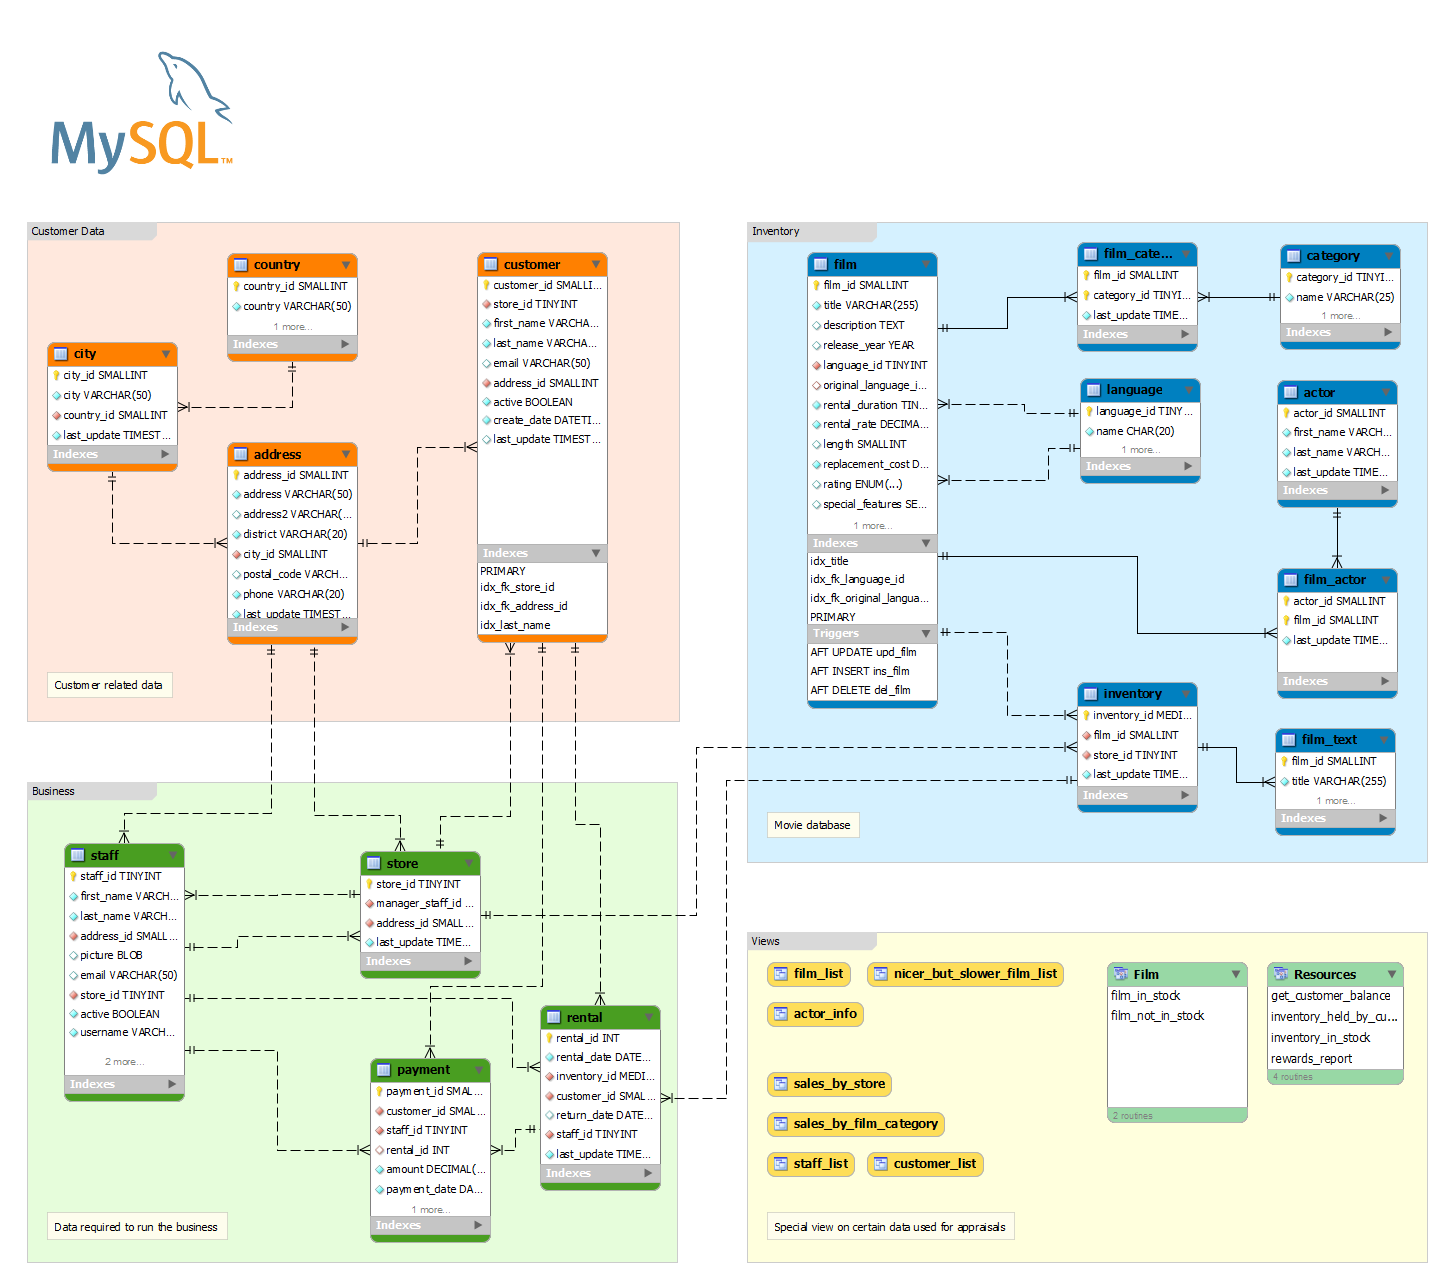

In [39]:
from IPython.display import Image, display_png
display_png(Image('sc03.png'))
# またDBを使います

## 1_SELECT文

### 1_1基礎

In [40]:
sql = """
select * 
from customer
"""
df = pd.read_sql(sql, db)
df.head(10)

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
5,6,2,JENNIFER,DAVIS,JENNIFER.DAVIS@sakilacustomer.org,10,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
6,7,1,MARIA,MILLER,MARIA.MILLER@sakilacustomer.org,11,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
7,8,2,SUSAN,WILSON,SUSAN.WILSON@sakilacustomer.org,12,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
8,9,2,MARGARET,MOORE,MARGARET.MOORE@sakilacustomer.org,13,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
9,10,1,DOROTHY,TAYLOR,DOROTHY.TAYLOR@sakilacustomer.org,14,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28


### 1_2列の指定

In [47]:
df.columns

Index(['customer_id', 'store_id', 'first_name', 'last_name', 'email',
       'address_id', 'active', 'create_date', 'last_update'],
      dtype='object')

例えば４つを指定します。
customer_id, store_id, first_name, last_name

In [76]:
sql = """
select customer_id, store_id, first_name, last_name 
from customer
order by store_id,customer_id
"""
df = pd.read_sql(sql, db)
df.head()

,customer_id,store_id,first_name,last_name
0,1,1,MARY,SMITH
1,2,1,PATRICIA,JOHNSON
2,3,1,LINDA,WILLIAMS
3,5,1,ELIZABETH,BROWN
4,7,1,MARIA,MILLER


### 1_3where文の追加　　
細かい条件の付け方  

（１）例えばcustomer_id が３番だと

In [28]:
sql = """
select * 
from customer
where customer_id =3
"""
df = pd.read_sql(sql, db)
df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28


（２）例えば　customer_id ３から6まで

In [31]:
sql = """
select * 
from customer
where customer_id >= 3
and customer_id <= 6
"""
# または where customer_id 3 and 6
df = pd.read_sql(sql, db)
df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
1,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
2,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
3,6,2,JENNIFER,DAVIS,JENNIFER.DAVIS@sakilacustomer.org,10,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28


（３）例えば　customer_id　３、６、９　を選ぶ

In [54]:
sql = """
select * 
from customer
where customer_id = 3
or customer_id = 6
or customer_id = 9
"""
# または where customer_id in (3,6,9)
df = pd.read_sql(sql, db)
df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
1,6,2,JENNIFER,DAVIS,JENNIFER.DAVIS@sakilacustomer.org,10,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
2,9,2,MARGARET,MOORE,MARGARET.MOORE@sakilacustomer.org,13,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28


（４）first_name が　Lから始まる場合

In [59]:
sql = """
select * 
from customer
where first_name like 'L%'
"""
# 最後尾なら'%L' どこかにであれば'%L%'
df = pd.read_sql(sql, db)
df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
1,11,2,LISA,ANDERSON,LISA.ANDERSON@sakilacustomer.org,15,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
2,22,1,LAURA,RODRIGUEZ,LAURA.RODRIGUEZ@sakilacustomer.org,26,1,2006-02-14 22:04:36.000,2011-09-14 18:10:28
3,78,1,LORI,WOOD,LORI.WOOD@sakilacustomer.org,82,1,2006-02-14 22:04:36.000,2011-09-14 18:10:30
4,83,1,LOUISE,JENKINS,LOUISE.JENKINS@sakilacustomer.org,87,1,2006-02-14 22:04:36.000,2011-09-14 18:10:30


（５）first_nameとlast_nameを結合する

In [82]:
sql = """
select first_name || ' ' || last_name as full_name
from customer
"""
# as 〇〇 は　列名を決め直せます'
df = pd.read_sql(sql, db)
df.head()

,full_name
0,MARY SMITH
1,PATRICIA JOHNSON
2,LINDA WILLIAMS
3,BARBARA JONES
4,ELIZABETH BROWN


In [85]:
sql = """
select count(*)
from customer
"""
# 合計であればsum(),平均ならavg()
df = pd.read_sql(sql, db)
df.head()

,count(*)
0,599


参照先はたくさんありますので条件に合う物を使いましょう。  
https://www.dbonline.jp/sqlite/function/

## 1_4順序


例えば番号順、新しい順、名前順などで並べたい場合は　  　
order by   
を使います。  
※名前順で日本語など全角文字を使うときは注意が必要


#### 番号順

In [96]:
sql = """
select customer_id,first_name || ' ' || last_name as full_name
from customer
order by customer_id
"""
df = pd.read_sql(sql, db)
df.head()

,customer_id,full_name
0,1,MARY SMITH
1,2,PATRICIA JOHNSON
2,3,LINDA WILLIAMS
3,4,BARBARA JONES
4,5,ELIZABETH BROWN


#### アルファベット順

In [95]:
sql = """
select customer_id,first_name || ' ' || last_name as full_name
from customer
order by first_name,last_name
"""
df = pd.read_sql(sql, db)
df.head()

,customer_id,full_name
0,375,AARON SELBY
1,367,ADAM GOOCH
2,525,ADRIAN CLARY
3,217,AGNES BISHOP
4,389,ALAN KAHN


In [98]:
#### 番号順（逆）

In [103]:
sql = """
select customer_id,first_name || ' ' || last_name as full_name
from customer
order by customer_id desc
"""
# 昇順はASCだが標準なので使わなくても良い
df = pd.read_sql(sql, db)
df.head()

,customer_id,full_name
0,599,AUSTIN CINTRON
1,598,WADE DELVALLE
2,597,FREDDIE DUGGAN
3,596,ENRIQUE FORSYTHE
4,595,TERRENCE GUNDERSON


## 1_5集約

GROUP BYを使います。  
例えばstore_idで件数を見たい。

In [107]:
sql = """
select store_id,count(*) as '件数'
from customer
group by store_id
"""
# order by 
df = pd.read_sql(sql, db)
df.head()

,store_id,件数
0,1,326
1,2,273


## テーブル結合

### 内部結合
それぞれのテーブルの指定したカラムの値が一致するものだけを結合します。  
関係性のあるものだけが出る。

In [119]:
sql = """
select city.city_id,city.city,country.country_id,country.country
from city
join country on 
city.city_id = country.country_id
"""
df = pd.read_sql(sql, db)
df.head()

,city_id,city,country_id,country
0,1,A Corua (La Corua),1,Afghanistan
1,2,Abha,2,Algeria
2,3,Abu Dhabi,3,American Samoa
3,4,Acua,4,Angola
4,5,Adana,5,Anguilla


または

In [121]:
sql = """
select city.city_id,
           city.city,
           country.country_id,
           country.country
from city,country
where city.country_id = country.country_id
"""
df = pd.read_sql(sql, db)
df.head()

,city_id,city,country_id,country
0,1,A Corua (La Corua),87,Spain
1,2,Abha,82,Saudi Arabia
2,3,Abu Dhabi,101,United Arab Emirates
3,4,Acua,60,Mexico
4,5,Adana,97,Turkey


### 外部結合

内部結合のようにそれぞれのテーブルの指定したカラムの値が一致するものを結合するのに加え、どちらかのテーブルにしか存在しないものに関しても取得します。  
- 片方は全部出る。
- もう片方は無ければ出ない
- もう片方が複数ある場合は全部出る方が複数出る。

In [126]:
sql = """
select city.city_id,city.city,address.address_id,address.address
from city
left join address on 
city.city_id= address.city_id
order by city.city_id
"""
# 他にもwhere city_id = 42

df = pd.read_sql(sql, db)
df

,city_id,city,address_id,address
0,1,A Corua (La Corua),56.0,939 Probolinggo Loop
1,2,Abha,105.0,733 Mandaluyong Place
2,3,Abu Dhabi,457.0,535 Ahmadnagar Manor
3,4,Acua,491.0,1789 Saint-Denis Parkway
4,5,Adana,332.0,663 Baha Blanca Parkway
5,6,Addis Abeba,397.0,614 Pak Kret Street
6,7,Aden,214.0,751 Lima Loop
7,8,Adoni,372.0,230 Urawa Drive
8,9,Ahmadnagar,302.0,922 Vila Velha Loop
9,10,Akishima,580.0,923 Tangail Boulevard


### sqliteテーブル名を取得

In [35]:
sql = "select name from sqlite_master where type='table';"
df = pd.read_sql(sql, db)
df

,name
0,actor
1,country
2,city
3,address
4,language
5,category
6,customer
7,film
8,film_actor
9,film_category


### sqliteビュー名の取得

In [36]:
sql = "select name from sqlite_master where type='view';"
df = pd.read_sql(sql, db)
df

,name
0,customer_list
1,film_list
2,staff_list
3,sales_by_store
4,sales_by_film_category
